In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import ot

from functions import *
from noisy_graphs import *
from sample_graphs import *
from frank_wolfe import *
from grampa import *
from eigenalign import *
from isorank import *
from Electrical_network import *

6.6332495807108


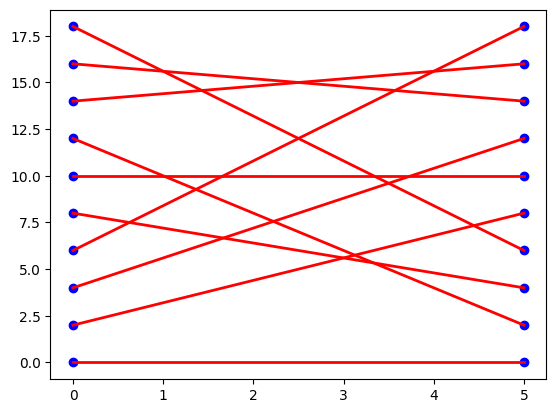

In [15]:
n = 10
p = 0.6
s = 0.8

A_eq, b_eq = bistochastic_equality_constraints(n)

G, Gp, A, Ap = sample_correlated_Erdos_Renyi(n, p, s)
R = eff_resistance(G)
Rp = eff_resistance(Gp)

T = ot.gromov.entropic_gromov_wasserstein(R, Rp,epsilon=0.1, loss_fun='square_loss')
T = project_to_perm(T, A_eq, b_eq)
plot_alignment(G, Gp, T)
plt.plot()
print(np.linalg.norm(A - T @ Ap @ T.T))

3.4641016151377544


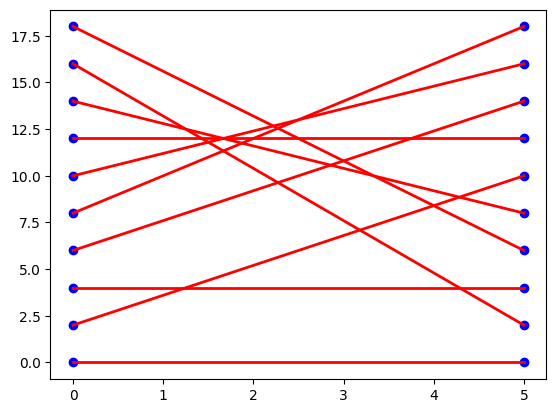

In [16]:

Tp = ot.gromov.entropic_gromov_wasserstein(A.toarray(), Ap.toarray(),epsilon=0.1, loss_fun='square_loss')
Tp = project_to_perm(Tp, A_eq, b_eq)
plot_alignment(G, Gp, Tp)
plt.plot()
print(np.linalg.norm(A - Tp @ Ap @ Tp.T))